In [1]:
import os
import cobra
from cobra.io import read_sbml_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def import_models(file_path, extension='.xml'):
    files = [file for file in os.listdir(file_path) if file.endswith(extension)]
    models={}
    for x in files:
        split_name = x.split('.')
        file_name = split_name[0]
        models[file_name] = file_path + x
        
    return models

In [2]:
file_path = 'C:/Users/User/Documents/GitHub/10 AGORA models/'
models = import_models(file_path)

In [13]:
def FBA_solver(models, reaction = 'EX_glc_D(e)'):
    model_results = [[] for i in range(len(models.keys()))]
    x = 0
    for y in models.keys():
        model = read_sbml_model(models[y])
        solution = model.optimize()
        while x < 10:
            model_results[x].append(y)
            model_results[x].append(solution.objective_value)
            model_results[x].append(solution.fluxes[reaction])
            break
        x += 1
        
    df = pd.DataFrame(model_results, columns=['Model Name', 'Growth', 'Glucose Flux'], index=[i for i in range(1, len(model_results)+1)])
    return df

FBA_solver(models)

,Model Name,Growth,Glucose Flux
1,Abiotrophia_defectiva_ATCC_49176,65.662169,0.000000
2,Actinomyces_georgiae_DSM_6843,50.144125,0.000000
3,Bacillus_altitudinis_41KF2b,72.901606,0.000000
4,Bifidobacterium_thermacidophilum_subsp_thermac...,79.944926,0.000000
5,Bradyrhizobium_japonicum_USDA_6,83.867455,0.000000
6,Clostridium_botulinum_F_str_230613,83.714319,0.000000
7,Hafnia_alvei_BIDMC_31,159.051383,0.000000
8,Klebsiella_oxytoca_KCTC_1686,157.596633,-19.708247
9,Paenibacillus_graminis_C4D1M,179.263560,0.000000
10,Raoultella_planticola_ATCC_33531,156.565919,0.000000


In [11]:
import pandas as pd

def FBA_solver(models, reaction='EX_glc_D(e)'):
    model_results = []
    
    for i, model_name in enumerate(models.keys()):
        if i >= 10:  # Limit to 10 models
            break
        
        model = read_sbml_model(models[model_name])
        solution = model.optimize()
        
        if solution.status == 'optimal':  # Check if the solution is optimal
            model_results.append([
                model_name,
                solution.objective_value,
                solution.fluxes.get(reaction, 0)  # Use .get() to avoid KeyError
            ])
        else:
            model_results.append([
                model_name,
                None,  # No growth value if not optimal
                None   # No glucose flux if not optimal
            ])
    
    df = pd.DataFrame(model_results, columns=['Model Name', 'Growth', 'Glucose Flux'])
    return df

#Example usage:
df = FBA_solver(models)
df


,Model Name,Growth,Glucose Flux
0,Abiotrophia_defectiva_ATCC_49176,65.662169,0.000000
1,Actinomyces_georgiae_DSM_6843,50.144125,0.000000
2,Bacillus_altitudinis_41KF2b,72.901606,0.000000
3,Bifidobacterium_thermacidophilum_subsp_thermac...,79.944926,0.000000
4,Bradyrhizobium_japonicum_USDA_6,83.867455,0.000000
5,Clostridium_botulinum_F_str_230613,83.714319,0.000000
6,Hafnia_alvei_BIDMC_31,159.051383,0.000000
7,Klebsiella_oxytoca_KCTC_1686,157.596633,-19.708247
8,Paenibacillus_graminis_C4D1M,179.263560,0.000000
9,Raoultella_planticola_ATCC_33531,156.565919,0.000000


In [23]:
def get_exchange_reactions(models):
    model_name = []
    exchange_reactions = []
    exchange_fluxes = [[] for i in range (len(models.keys()))]
    i = 0
    for y in models.keys():
        model = read_sbml_model(models[y])
        model_name.append(y)
        new_exchange_reactions = [exr.id for exr in model.reactions if exr.id.startswith("EX_") and exr.id not in exchange_reactions]
        exchange_reactions.extend(new_exchange_reactions)
        
    for y in models.keys():
        model = read_sbml_model(models[y])        
        solution = model.optimize()
        for x in exchange_reactions:
            if x in model.reactions:
                flux_value = solution.fluxes.get(x)
                exchange_fluxes[i].append(flux_value)
            else:
                exchange_fluxes[i].append(None)
                              
        i += 1
            
    
    return model_name, exchange_reactions, exchange_fluxes
#     return len(exchange_fluxes[1])

In [24]:
model_name, exchange_reactions, exchange_fluxes = get_exchange_reactions(models)

#len(exchange_fluxes[0])

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.DataFrame(exchange_fluxes, columns=[exchange_reactions], index=[model_name])
df

,EX_4abut(e),EX_ac(e),EX_acald(e),EX_adocbl(e),EX_ala_L(e),EX_alaasp(e),EX_alagln(e),EX_alaglu(e),EX_alagly(e),EX_alahis(e),EX_alaleu(e),EX_alathr(e),EX_arab_L(e),EX_arg_L(e),EX_arsenb(e),EX_asn_L(e),EX_aso3(e),EX_aso4(e),EX_asp_L(e),EX_biomass(e),EX_btn(e),EX_ca2(e),EX_cbl1(e),EX_cbl2(e),EX_cd2(e),EX_cgly(e),EX_cit(e),EX_cl(e),EX_co2(e),EX_cobalt2(e),EX_cu2(e),EX_cys_L(e),EX_dextrin(e),EX_drib(e),EX_etoh(e),EX_fe2(e),EX_fe3(e),EX_fol(e),EX_for(e),EX_gal(e),EX_glc_D(e),EX_gln_L(e),EX_glu_L(e),EX_gly(e),EX_glyasn(e),EX_glyasp(e),EX_glyb(e),EX_glyc3p(e),EX_glycys(e),EX_glygln(e),EX_glyglu(e),EX_glyleu(e),EX_glymet(e),EX_glyphe(e),EX_glypro(e),EX_glytyr(e),EX_h(e),EX_h2o(e),EX_hg2(e),EX_his_L(e),EX_hxan(e),EX_ile_L(e),EX_k(e),EX_lac_D(e),EX_lac_L(e),EX_lcts(e),EX_leu_L(e),EX_lys_L(e),EX_malt(e),EX_malthx(e),EX_malttr(e),EX_mantr(e),EX_met_D(e),EX_met_L(e),EX_metala(e),EX_metsox_R_L(e),EX_metsox_S_L(e),EX_mg2(e),EX_mn2(e),EX_mqn7(e),EX_na1(e),EX_nac(e),EX_nh4(e),EX_o2(e),EX_ocdca(e),EX_orn(e),EX_pb(e),EX_phe_L(e),EX_pheme(e),EX_pi(e),EX_pnto_R(e),EX_pro_L(e),EX_pullulan1200(e),EX_pydx(e),EX_rib_D(e),EX_ribflv(e),EX_ser_L(e),EX_sheme(e),EX_so4(e),EX_spmd(e),EX_stys(e),EX_succ(e),EX_sucr(e),EX_taur(e),EX_thm(e),EX_thr_L(e),EX_thymd(e),EX_tma(e),EX_tre(e),EX_trp_L(e),EX_tyr_L(e),EX_val_L(e),EX_xyl_D(e),EX_zn2(e),EX_12dgr180(e),EX_12ppd_S(e),EX_4abz(e),EX_4hbz(e),EX_Tyr_ggn(e),EX_acgam(e),EX_alltn(e),EX_arbt(e),EX_csn(e),EX_dcyt(e),EX_fru(e),EX_galt(e),EX_gam(e),EX_gcald(e),EX_glyc(e),EX_glygn2(e),EX_glygn4(e),EX_glygn5(e),EX_gthox(e),EX_gua(e),EX_inost(e),EX_man(e),EX_mnl(e),EX_no2(e),EX_no3(e),EX_ppa(e),EX_ppi(e),EX_ptrc(e),EX_pydam(e),EX_pydxn(e),EX_rmn(e),EX_salcn(e),EX_sbt_D(e),EX_strch1(e),EX_strch2(e),EX_ura(e),EX_15dap(e),EX_26dap_M(e),EX_3mop(e),EX_Cit_Mg(e),EX_Lcyst(e),EX_acgal(e),EX_adn(e),EX_ala_D(e),EX_arabttr(e),EX_but(e),EX_butso3(e),EX_cellb(e),EX_chol(e),EX_chols(e),EX_crn(e),EX_cro4(e),EX_ctbt(e),EX_cytd(e),EX_dad_2(e),EX_dgsn(e),EX_din(e),EX_duri(e),EX_ethso3(e),EX_fecrm(e),EX_fum(e),EX_galctn_D(e),EX_gbbtn(e),EX_glcn(e),EX_h2s(e),EX_hexs(e),EX_icit[e],EX_ind3ac(e),EX_ins(e),EX_isetac(e),EX_mal_L(e),EX_mops(e),EX_mso3(e),EX_ser_D(e),EX_sulfac(e),EX_tsul(e),EX_uri(e),EX_xan(e),EX_13ppd(e),EX_34dhphe(e),EX_5htrp(e),EX_dopa(e),EX_hista(e),EX_inulin(e),EX_melib(e),EX_raffin(e),EX_srtn(e),EX_trypta(e),EX_ttdca(e),EX_tym(e),EX_xylan(e),EX_2dmmq8(e),EX_2hyoxplac(e),EX_2obut(e),EX_3hcinnm(e),EX_3hpppn(e),EX_4hoxpacd(e),EX_akg(e),EX_bhb(e),EX_dhcinnm(e),EX_dhpppn(e),EX_galct_D(e),EX_glcr(e),EX_glyclt(e),EX_gthrd(e),EX_h2(e),EX_mqn8(e),EX_n2(e),EX_n2o(e),EX_ncam(e),EX_ni2(e),EX_no(e),EX_ocdcea(e),EX_pppn(e),EX_q8(e),EX_2ddglcn(e),EX_3dhcdchol(e),EX_3dhchol(e),EX_amp(e),EX_icdchol(e),EX_ind3ppa(e),EX_isocapr(e),EX_isochol(e),EX_r34hpp(e),EX_34dhpha(e),EX_3hphac(e),EX_HC00319(e),EX_cynt(e),EX_etha(e),EX_fuc1p_L(e),EX_g6p(e),EX_galur(e),EX_glcur(e),EX_gsn(e),EX_hdca(e),EX_man6p(e),EX_nmn(e),EX_5mta(e),EX_actn_R(e),EX_btd_RR(e),EX_diact(e),EX_fuc_L(e),EX_indole(e),EX_pac(e),EX_urea(e),EX_xtsn(e),EX_Lkynr[e],EX_acac(e),EX_chor(e)
Abiotrophia_defectiva_ATCC_49176,9.818949e+02,1000.000000,999.344902,0.0,-23.825669,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0,-13.220401,0.0,-9.739669,0.0,0.0,-15.078437,65.662169,0.0,-0.521338,0.0,0.0,0.0,-5.213379e-01,-1.042676,-0.521338,1000.000000,-0.521338,-0.521338,-4.782399,0.0,0.0,-1000.000000,-0.521338,-0.521338,-1.564014,89.216341,0.000000,0.000000,-34.916896,-981.894944,985.781435,0.000000,0.0,-988.300397,-86.301870,0.000000,0.000000,0.0,-1000.000000,0.0,0.000000,-10.573579,0.0,-735.459000,-773.818807,0.0,-5.380883,-9.935868,-23.216541,-0.521338,0.000000,899.758534,0.0,971.725502,-21.254844,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,-7.973994,0.0,0.0,-0.521338,-0.521338,-1.042676,0.0,-1.042676e+00,0.000000,-1.685823e-16,-5.459520,-1.335953e-12,0.0,-11.569018,-0.521338,4.739522,-1.042676,0.000000,0.0,-0.521338,0.000000e+00,-1.042676,-18.009170,-0.521338,-0.521338,-0.521338

<AxesSubplot:xlabel='None', ylabel='None'>

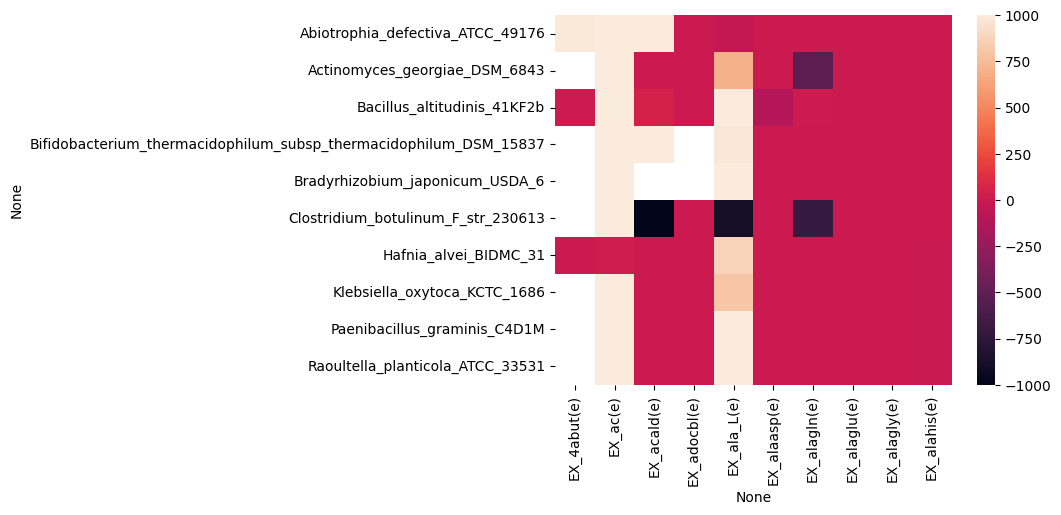

In [26]:
import seaborn as sns
df_subset = df.iloc[:, :10] # displying only the first 10 exchange reactions for clarity
sns.heatmap(df_subset)

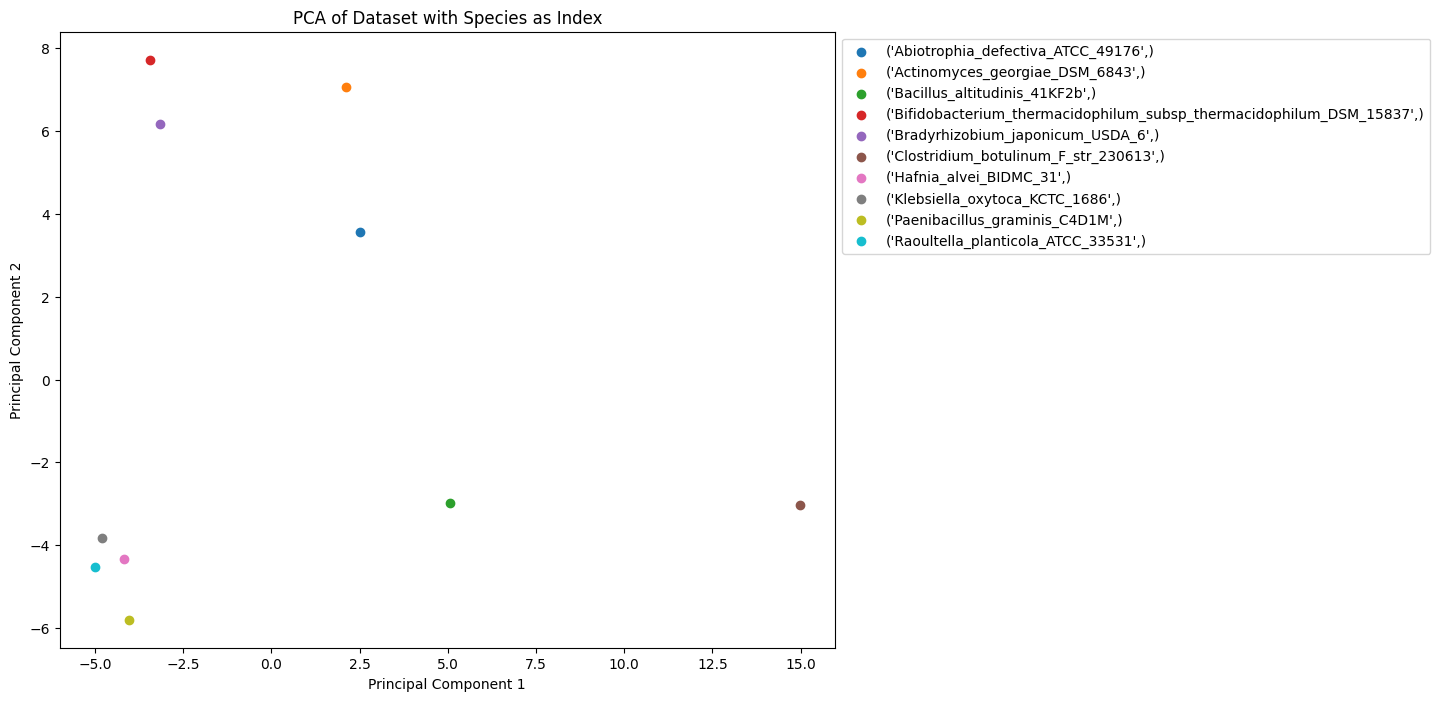

In [37]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X = df.values
species = df.index 

# If your columns are tuples, flatten them
df.columns = ['_'.join(map(str, col)) if isinstance(col, tuple) else str(col) for col in df.columns]

# Initialize SimpleImputer with constant strategy to replace missing fluxes with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_r = pca.fit_transform(scaled_data)

# Create the scatter plot
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10', len(species.unique()))  # Get a color map

# Plot each species using the unique species names directly
for i, name in enumerate(species.unique()):
    plt.scatter(X_r[species == name, 0], X_r[species == name, 1], color=colors(i), label=name)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust this to move the legend
plt.title('PCA of Dataset with Species as Index')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()

In [36]:
# Get the principal components
components = pca.components_  # Shape: (n_components, n_features)

# Get the explained variance
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to show loadings
loadings_df = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])], index=df.columns)
print(loadings_df)

                             PC1           PC2
EX_4abut(e)         2.291692e-02  4.473481e-02
EX_ac(e)            3.830687e-02  5.438424e-02
EX_acald(e)        -8.001717e-02  9.901145e-02
EX_adocbl(e)       -5.692322e-17 -2.719767e-16
EX_ala_L(e)        -1.387772e-01  6.823852e-03
EX_alaasp(e)       -4.625351e-02  3.731109e-02
EX_alagln(e)       -1.289513e-01 -2.293112e-02
EX_alaglu(e)       -8.051092e-17 -1.560642e-16
EX_alagly(e)       -2.833835e-17 -3.515396e-17
EX_alahis(e)        1.055260e-01  1.412100e-01
EX_alaleu(e)       -1.926442e-02 -8.844751e-02
EX_alathr(e)       -3.900680e-02 -9.184423e-02
EX_arab_L(e)       -0.000000e+00  0.000000e+00
EX_arg_L(e)         1.069880e-01  2.891385e-02
EX_arsenb(e)       -0.000000e+00  0.000000e+00
EX_asn_L(e)         5.702924e-03  1.468153e-01
EX_aso3(e)         -0.000000e+00  0.000000e+00
EX_aso4(e)         -0.000000e+00  0.000000e+00
EX_asp_L(e)         9.388851e-02 -9.610848e-02
EX_biomass(e)      -9.498042e-02 -1.475665e-01
EX_btn(e)    

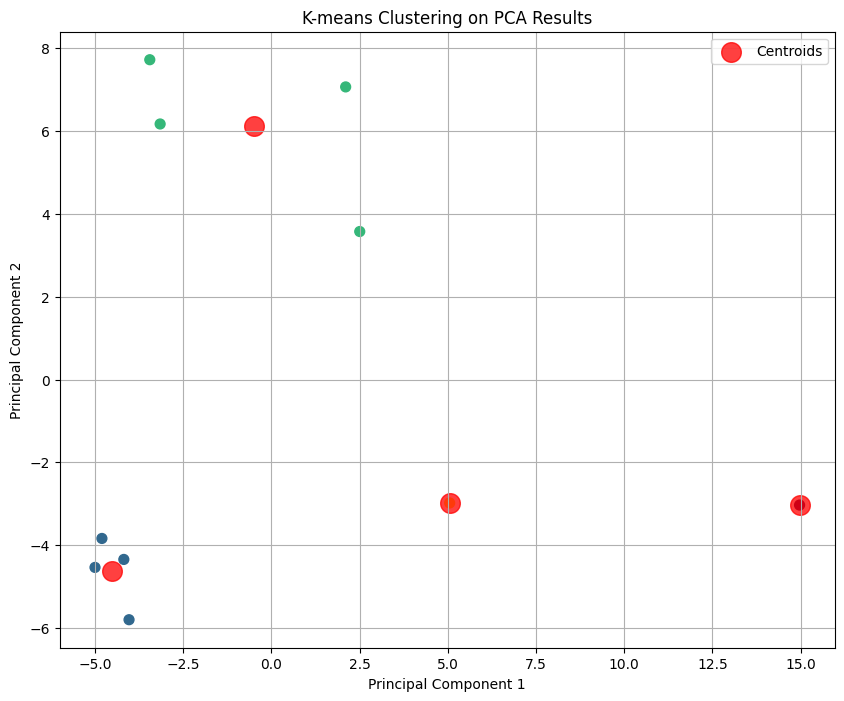

In [53]:
from sklearn.cluster import KMeans

# Performing K-means clustering
n_clusters = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
y_kmeans = kmeans.fit_predict(X_r)

# Step 2: Create the plot
plt.figure(figsize=(10, 8))
plt.scatter(X_r[:, 0], X_r[:, 1], c=y_kmeans, s=50, cmap='viridis')  # Clustered points
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroids')  # Cluster centers

# Step 3: Add titles and labels
plt.title('K-means Clustering on PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

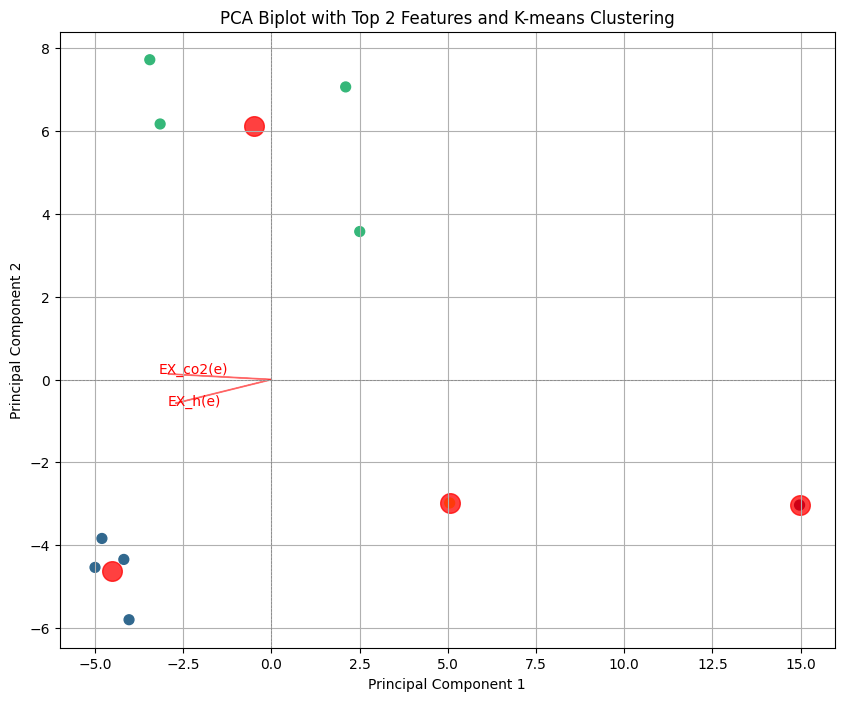

In [56]:
# Get PCA loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a biplot
plt.figure(figsize=(10, 8))

# Scatter plot of PCA results colored by clusters
plt.scatter(X_r[:, 0], X_r[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Models')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroids')

# Identify top 2 features based on loadings
top_indices = np.argsort(np.abs(loadings[:, 0]))[-2:]  # Top 2 features for PC1
top_indices = top_indices[np.argsort(np.abs(loadings[top_indices, 1]))]  # Sort by PC2 loadings

scaling_factor = 3

for i in top_indices:
    plt.arrow(0, 0, loadings[i, 0]* scaling_factor , loadings[i, 1] * scaling_factor, color='r', alpha=0.5, width=0.01)
    plt.text(loadings[i, 0] * scaling_factor* 1.1, loadings[i, 1] *scaling_factor* 1.1, df.columns[i], color='r')


plt.title('PCA Biplot with Top 2 Features and K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.grid()
plt.show()

ModuleNotFoundError: No module named 'adjustText'